In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import denn.utils

# RK4

In [3]:
from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def sho_deriv(t, xz):
    """ 
    dxdt = z
    dzdt = -x
    """
    x = xz[0]
    z = xz[1]
    rhs = np.array([z, -x]) # .astype(np.single)
    return rhs

In [45]:
t, sol = rk4(sho_deriv, [0, 6.28], [0,1], 400)

In [46]:
t.dtype, sol.dtype

(dtype('float32'), dtype('float32'))

In [47]:
x = sol[:,0]

In [48]:
mse = np.mean((x - np.sin(t))**2)

In [49]:
mse

1.3901156e-11

# Only Change Perturb Randomness

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# folder = lambda i: f"/Users/dylanrandle/Downloads/SHO_run_gan_052320_seed{i}/val_mse.npy"
# gan_reps = []
# for i in range(5):
#     gan_reps.append(np.load(folder(i)))
# gan_reps = np.vstack(gan_reps)

In [3]:
# gan_reps = np.load('../../experiments/reps/sho_gan_rand_reps_fixedmodels.npy')
# gan_reps = np.load("/Users/dylanrandle/Downloads/sho_gan_rand_reps_may18_2020.npy")
# gan_reps = np.load("/Users/dylanrandle/Downloads/sho_gan_reps_besthyper_052120_small.npy")
gan_reps = np.load("/Users/dylanrandle/Downloads/sho_gan_reps_besthype_052120.npy")

# l2_reps = np.load('../../experiments/reps/sho_l2_rand_reps_fixedmodels.npy')
# l2_reps = np.load("/Users/dylanrandle/Downloads/sho_mse_rand_reps_may18_2020.npy")
l2_reps = np.load("/Users/dylanrandle/Downloads/sho_reps_052320_mse.npy")
# l2_reps2 = np.load("/Users/dylanrandle/Downloads/sho_mse_rand_reps_may18_2020_defaultLR.npy")

# l1_reps = np.load('../../experiments/reps/sho_l1_rand_reps_fixedmodels.npy')
# l1_reps = np.load("/Users/dylanrandle/Downloads/sho_l1_rand_reps_may18_2020.npy")
l1_reps = np.load("/Users/dylanrandle/Downloads/sho_reps_052320_l1.npy")

# huber_reps = np.load('../../experiments/reps/sho_huber_rand_reps_fixedmodels.npy')
# huber_reps = np.load("/Users/dylanrandle/Downloads/sho_huber_rand_reps_may18_2020.npy")
huber_reps = np.load("/Users/dylanrandle/Downloads/sho_reps_052320_huber.npy")

In [4]:
import denn.utils as ut

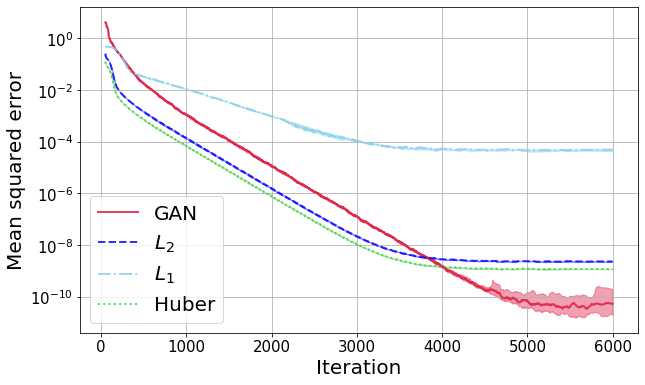

In [8]:
n = 6000
arrs_dict = {"GAN": gan_reps[:,:n], 
             "$L_2$": l2_reps[:,:n],
             "$L_1$": l1_reps[:,:n], 
             "Huber": huber_reps[:,:n],
#              "RK4": mse*np.ones_like(gan_reps[:,:n])
            }
ut.plot_reps_results(arrs_dict, fname=None, # "sho_rand_reps_big.jpg", 
                     window=50, figsize=(10,6), pctiles=(25,75))

In [6]:
print(f"L1 Min: {np.min(l1_reps)}")
print(f"L2 Min: {np.min(l2_reps)}")
print(f"Huber Min: {np.min(huber_reps)}")
print(f"GAN Min: {np.min(gan_reps)}")

L1 Min: 2.0999001208110712e-05
L2 Min: 1.6385502954463504e-09
Huber Min: 8.523606820354246e-10
GAN Min: 1.2836203454325013e-12


# After tuning classical

In [4]:
l2_reps_tuned = np.load('../../experiments/reps/sho_l2_rand_reps_classical_tuned.npy')
l1_reps_tuned = np.load('../../experiments/reps/sho_l1_rand_reps_classical_tuned.npy')
huber_reps_tuned = np.load('../../experiments/reps/sho_huber_rand_reps_classical_tuned.npy')

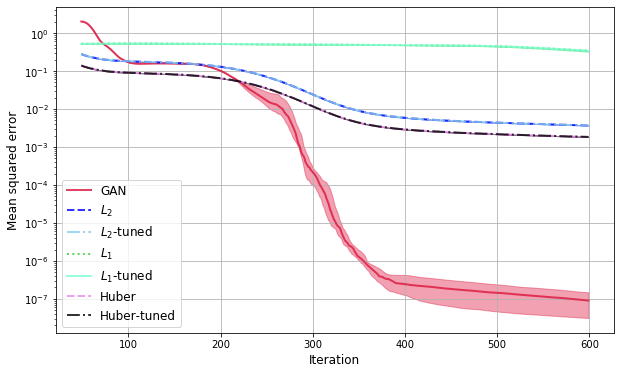

In [5]:
arrs_dict = {"GAN": gan_reps, 
             "$L_2$": l2_reps,
             "$L_2$-tuned": l2_reps_tuned,
             "$L_1$": l1_reps, 
             "$L_1$-tuned": l1_reps_tuned,
             "Huber": huber_reps,
             "Huber-tuned": huber_reps_tuned}
ut.plot_reps_results(arrs_dict, fname="sho_rand_reps_classic_tune.png", figsize=(10,6), window=50)